In [1]:
from settings import *
%matplotlib inline
config_dict = process_config()
info_file = config_dict['data']['exp_design']
info = pd.read_csv(info_file, index_col=0)
count_file = config_dict['counts']['tpms_4']
figures_dir = config_dict['out_dir']['figures']
results_dir = config_dict['out_dir']['tables']

info = info[info.experiment == "E1"]
info["position"] = info["position"].str.replace("L-HI", wt_L)
info["position"] = info["position"].str.replace("L-9C", mut_L)

/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/lib/config


In [2]:
# 4 hour counts
cnts = pd.read_csv(count_file, index_col=0)
cnts.head()

,S63630,S63631,S63632,S63633,S63634,S63635,S63636,S63638,S63639,S63641
tags,,,,,,,,,,
PMI0001,75.672985,80.218679,113.945252,105.677261,120.225793,134.932404,41.152909,125.444096,144.720633,123.542147
PMI0010,747.545458,797.656680,717.590266,488.448314,403.832666,552.610174,510.093592,762.584114,692.952270,615.876271
PMI0102,35.925549,34.811358,39.762120,36.594152,29.035814,33.477393,30.493612,36.552635,32.802474,35.669631
PMI1034,1020.625002,998.275530,1137.007267,891.899412,813.464578,846.209219,964.142939,1024.868359,796.611352,604.047207
PMI1035,6841.406119,7328.723902,7445.746579,7122.765659,6281.066042,6207.269929,8882.141360,6302.826720,5725.194389,6395.139741


In [3]:
tpms_norm = cnts.apply(vis.invnorm)

In [4]:
pDf, pc1_var, pc2_var = vis.findTwoComponents(tpms_norm, info)
pDf

,PC1,PC2,experiment,case,time_point,strain,position,RIN
S63630,12.852522,-3.683254,E1,Case1,0 min,HI,Merge,NaN
S63631,11.892671,-3.583264,E1,Case1,0 min,HI,Merge,NaN
S63632,7.784692,-5.349111,E1,Case1,0 min,HI,Merge,NaN
S63633,-10.474745,1.087774,E1,Case2,4 hrs,HI,Merge,NaN
S63634,-13.016871,1.656831,E1,Case2,4 hrs,HI,Merge,NaN
S63635,-13.607481,1.007994,E1,Case2,4 hrs,HI,Merge,NaN
S63636,19.760217,12.465693,E1,Case3,0 min,Mix,Dienes Line,NaN
S63638,6.958177,-5.714312,E1,Case3,0 min,Mix,Dienes Line,NaN
S63639,-9.353599,-0.369505,E1,Case4,4 hrs,Mix,Dienes Line,NaN
S63641,-12.795582,2.481153,E1,Case4,4 hrs,Mix,Dienes Line,NaN


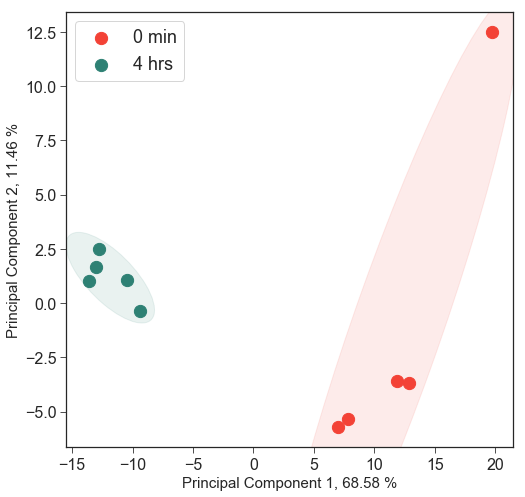

In [5]:
fn = os.path.join(figures_dir, "Figure_2a.png")
g = vis.plotPCA(pDf, pc1_var, pc2_var,"time_point", c=[col1, col4],
        filename=fn, el=True)

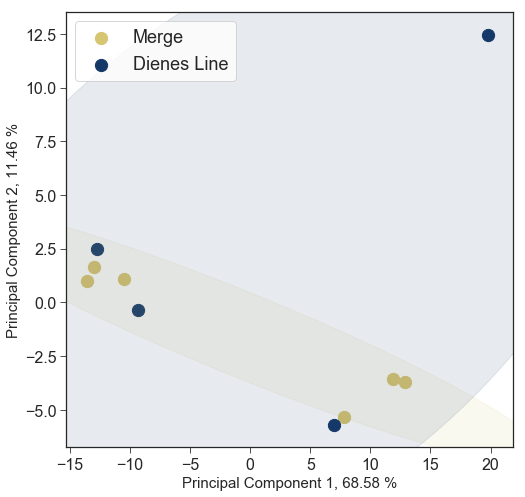

In [6]:
fn = os.path.join(figures_dir, "Figure_2b.png")
g = vis.plotPCA(pDf, pc1_var, pc2_var,"position", c=[col2,col5], filename=fn,el=True)

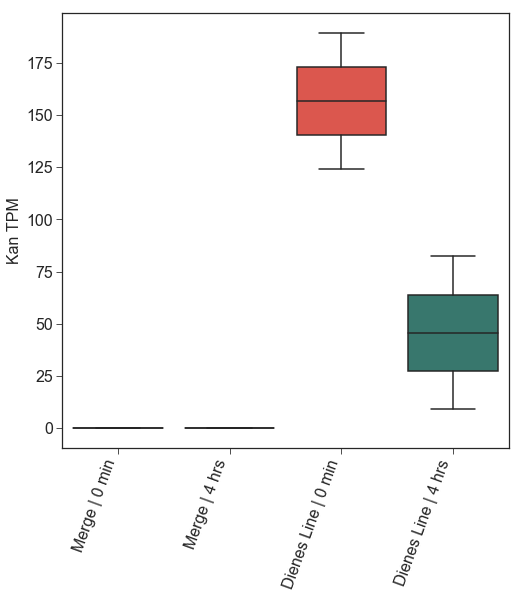

In [7]:
# Because it is only one gene RPKM and TPM will be the same

mk_file = config_dict["data"]["mutant_killing"]
mk = pd.read_csv(mk_file, index_col=0, names=["Kan RPKM"])
mk = mk.join(info, how='inner')
mk["samples"] = [samples[i] for i in mk.case]

fig = plt.figure(figsize = (8,8))
order = [samples["Case1"], samples["Case2"], samples["Case3"], samples["Case4"]]
ax = sns.boxplot(x= "samples", y="Kan RPKM", data = mk, palette=[col2, col5, col1, col4], order=order);
plt.yticks(fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 70, fontsize = 16,ha="right")
ax.set_xlabel("")
ax.set_ylabel("Kan TPM", fontsize=16)
fig.savefig(os.path.join(figures_dir, "Figure_2c.png"), dpi=300, bbox_inches="tight")

In [8]:
def get_rid_of_genbank(df, column_name = "Function", genbank = "GenBank"):
    fx = df[column_name]
    fx = fx.str.replace("\({}\)".format(genbank), "")
    df[column_name] = fx
    return df

In [9]:
# Looking at common patterns of gene expression

de_DL = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
        "tables/2018-06-28-wt-dienes-line-0-4_edited.csv"
de_ME = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
        "tables/2018-06-28-wt-swarm-front-0-4_edited.csv"
    
    
de_mut= pd.read_csv(de_DL, index_col=0)
de_wt= pd.read_csv(de_ME, index_col=0)
de_mut = get_rid_of_genbank(de_mut)
de_wt = get_rid_of_genbank(de_wt)


de_mut = de_mut.drop(["Mean Expression"], axis=1).sort_index()
de_mut.to_excel(os.path.join(results_dir, "CHANGES_IN_GENE_EXPRESSION_AT_THE_DIENES_LINE_4_HRS.xlsx"))

de_wt = de_wt.drop(["Mean Expression"], axis=1).sort_index()
de_wt.to_excel(os.path.join(results_dir, "CHANGES_IN_GENE_EXPRESSION_AT_THE_SWARM_FRONT_4_HRS.xlsx"))
